In [ ]:
#Importing Packages
# print_function for compatibility with Python 3
from __future__ import print_function

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set()
# pip install --upgrade pip
!pip install -U seaborn

In [ ]:
# General insights to the data  

In [19]:
bford =pd.read_csv("//Users//mookool//Desktop//IT_Experiment//BFord//BFordData.csv") # Read data from a CSV file)


In [20]:
bford.shape # no. of rows & columns 


(1852, 6)

In [21]:
bford.count().tail() #method returns


outcome          1852
outcome_value    1852
week             1852
year             1852
events           1852
dtype: int64

In [22]:
bford.head(10) #print 10 rows

,swVersion,outcome,outcome_value,week,year,events
0,sw1,manageable,Manageable,1,2010,17
1,sw1,manageable,Manageable,2,2010,184
2,sw1,manageable,Manageable,3,2010,267
3,sw1,manageable,Manageable,4,2010,240
4,sw1,manageable,Manageable,5,2010,257
5,sw1,manageable,Manageable,6,2010,272
6,sw1,manageable,Manageable,7,2010,244
7,sw1,manageable,Manageable,8,2010,254
8,sw1,manageable,Manageable,9,2010,236
9,sw1,manageable,Manageable,10,2010,271


In [23]:
bford.info() # Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 6 columns):
swVersion        1852 non-null object
outcome          1852 non-null object
outcome_value    1852 non-null object
week             1852 non-null int64
year             1852 non-null int64
events           1852 non-null int64
dtypes: int64(3), object(3)
memory usage: 86.9+ KB


In [24]:
bford.describe()# descritive analysis

,week,year,events
count,1852.000000,1852.0,1852.000000
mean,12.803456,2010.0,48.889849
std,6.282493,0.0,79.916831
min,1.000000,2010.0,1.000000
25%,7.000000,2010.0,6.000000
50%,14.000000,2010.0,17.000000
75%,18.000000,2010.0,49.000000
max,23.000000,2010.0,435.000000


In [25]:
bford['events'].describe() #event description

count    1852.000000
mean       48.889849
std        79.916831
min         1.000000
25%         6.000000
50%        17.000000
75%        49.000000
max       435.000000
Name: events, dtype: float64

Text(0.5, 1.0, 'Events per Software Version')

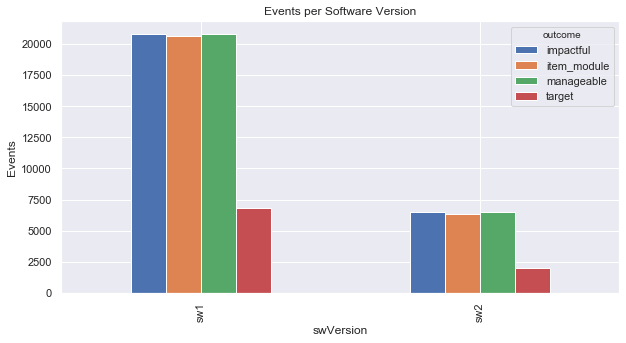

In [27]:
# Events per Software version
fig, ax = plt.subplots(figsize = (10,5))
bford.groupby(['swVersion','outcome']).sum()['events'].unstack().plot.bar(ax = ax)
plt.xlabel('swVersion')
plt.ylabel('Events')
plt.title('Events per Software Version')

In [28]:
bford ['events'].corr(bford['week']) # coorelation between events and week

-0.025025268883724198

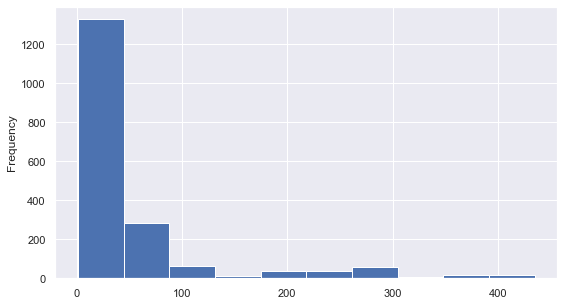

In [29]:
plt.figure(figsize = (9, 5)) # plot histogram
bford['events'].plot(kind ="hist")

In [30]:
print(bford ['outcome'].value_counts()) # lists values of outcome variable

item_module    1194
target          311
impactful       174
manageable      173
Name: outcome, dtype: int64


In [32]:
print(bford ['outcome_value'].value_counts()) # lists values of outcome_value

Impactful         87
Not Impactful     87
Manageable        87
TH                87
EAS               87
Not Manageable    86
WTDR              80
220R              79
ACK.WZ            79
W.I               79
TAM               78
DS                77
CPE               77
DIB               75
ACK.UL            70
CDNSSP            70
EMTT              69
SSUnk             66
BTJ               61
ACK.SE            60
SIG               27
PERMSR            27
SW.UNK            26
WZ                25
UNK.S             25
GC                25
TEMPSR            24
SSTAR             23
UNKLOC            23
EMT               23
ER                23
SW.AL             22
SOPDIRM           18
Name: outcome_value, dtype: int64


In [35]:
pd.crosstab(bford.outcome_value, bford.outcome)# cross tabulation of outcome and outcome_value variables

outcome,impactful,item_module,manageable,target
outcome_value,,,,
220R,0,79,0,0
ACK.SE,0,60,0,0
ACK.UL,0,70,0,0
ACK.WZ,0,79,0,0
BTJ,0,61,0,0
CDNSSP,0,70,0,0
CPE,0,77,0,0
DIB,0,75,0,0
DS,0,77,0,0


In [ ]:
# Trend analysis across outcome and outcome_value vs events on a weekly basis

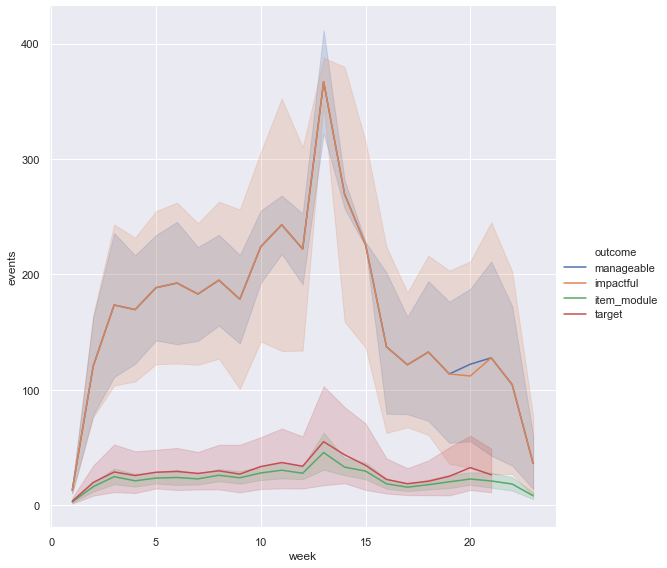

In [36]:
# Trend analysis per week of outcome vs. event
sns.relplot(x="week",  y="events",
            hue="outcome", data=bford,kind="line",height=8);

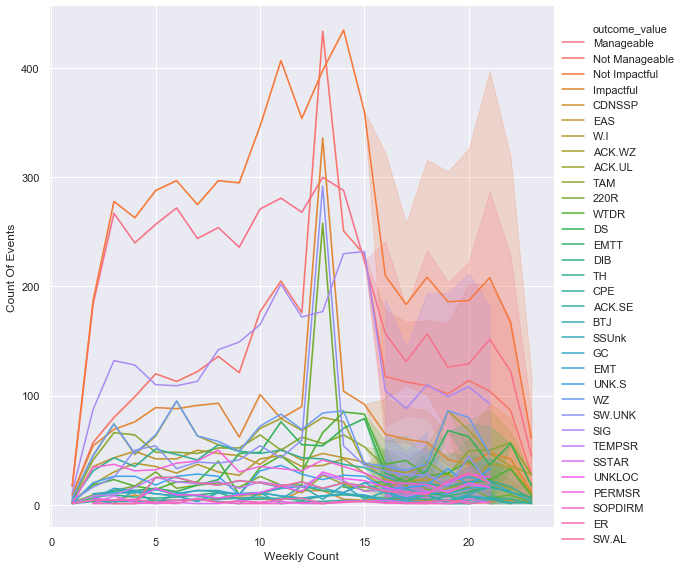

In [41]:
# Trend analysis per week of outcome-value vs event 
g= sns.relplot(x="week",  y="events", hue="outcome_value", data=bford,kind="line",height=8);
g.set_axis_labels("Weekly Count", "Count Of Events")

In [38]:
# Stats per outcome_value

bford.groupby('outcome_value')['events'].describe()

,count,mean,std,min,25%,50%,75%,max
outcome_value,,,,,,,,
220R,79.0,24.291139,47.387695,1.0,10.00,16.0,20.00,258.0
ACK.SE,60.0,4.583333,5.387656,1.0,1.00,3.0,4.00,25.0
ACK.UL,70.0,11.628571,7.340915,1.0,5.25,11.0,15.00,27.0
ACK.WZ,79.0,52.556962,27.363061,4.0,37.00,60.0,74.00,95.0
BTJ,61.0,7.885246,5.231629,1.0,5.00,6.0,12.00,18.0
CDNSSP,70.0,5.042857,3.038095,1.0,3.00,4.0,6.00,13.0
CPE,77.0,6.532468,3.665574,1.0,3.00,7.0,10.00,13.0
DIB,75.0,6.160000,2.922605,1.0,5.00,7.0,8.00,11.0
DS,77.0,35.883117,26.315882,1.0,12.00,31.0,56.00,79.0


Text(0.5, 1.0, 'Events per outcome per week')

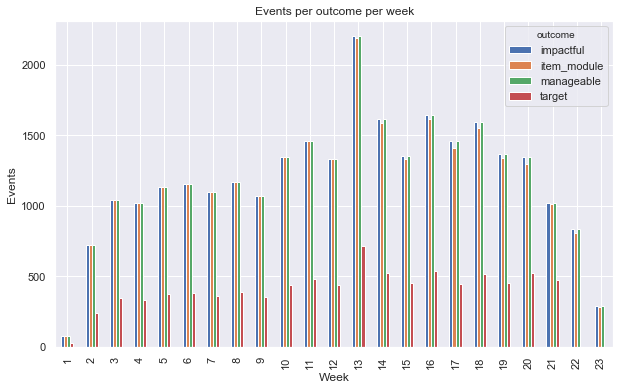

In [40]:
# stats per outcome_value
fig, ax = plt.subplots(figsize = (10,6))
bford.groupby(['week','outcome']).sum()['events'].unstack().plot.bar(ax = ax)
plt.xlabel('Week')
plt.ylabel('Events')
plt.title('Events per outcome per week')

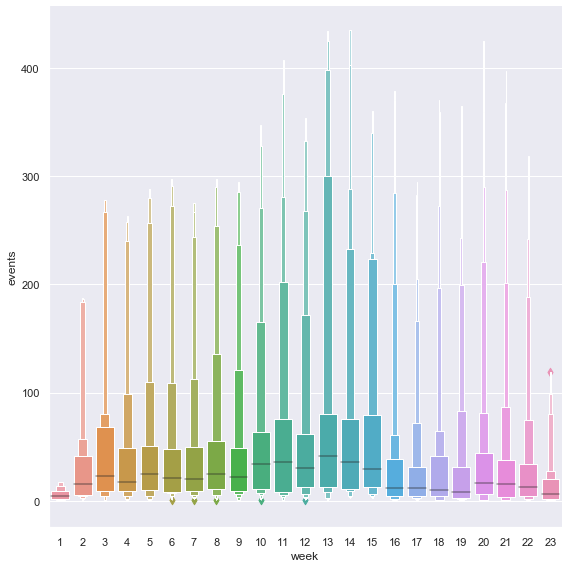

In [43]:
# Graphical representation of this year’s events

sns.catplot(x="week",  y="events",kind="boxen", data=bford, height=8);

